<a href="https://colab.research.google.com/github/scalabrinig/cdProjetoAplicadoIV/blob/master/projeto/cd_projeto_aplicado_IV_entrega_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <img src="https://raw.githubusercontent.com/scalabrinig/cdProjetoAplicadoIV/d093146488f56dfcf0ef286bcee8efe0e71b9c76/figuras/mackenzie_logo.jpg" width="25%" align="right"/>

# **PROJETO APLICADO IV - Ciência de Dados EaD - 2025/02**


# **Entrega 3**

---

# **Titulo do Projeto**:

# **Projeto Aplicado IV – Análise de séries temporais para descrição e previsões**

In [ ]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'Carlos Oliveira, 10424072' #@param {type:"string"}
Aluno2 = 'Erick Isidoro, 10424337' #@param {type:"string"}
Aluno3 = 'Felipe Perraz, 10218996' #@param {type:"string"}


# **Introdução**

O comércio eletrônico foi consolidado como um dos principais vetores de crescimento econômico na era digital, impulsionado pela expansão do acesso à internet, pela evolução das tecnologias de informação e comunicação e pela diversificação dos hábitos de consumo. No Brasil, o setor foi responsável por um faturamento de R$ 61,9 bilhões em 2018, com crescimento médio anual de 16,5% entre 2016 e 2018, porém foram identificados desafios como ruptura de estoque, custos elevados de armazenagem e falta de previsibilidade da demanda.
Essas lacunas motivaram a aplicação de modelos de séries temporais e técnicas de machine learning para extrair conhecimento de dados históricos, reduzir perdas decorrentes da ausência de previsões adequadas e subsidiar decisões em logística e marketing. Por meio da análise temporal, serão identificadas tendências, sazonalidades e ciclos de demanda que contribuem para o equilíbrio entre oferta e demanda, a otimização de estoques e a minimização de desperdícios.

#### **Objetivo geral**

Será desenvolvido um sistema de análise de séries temporais para investigar padrões de vendas no comércio eletrônico brasileiro, utilizando como base o Olist E Commerce Dataset (2016–2018), com o propósito de gerar previsões acuradas de volume de pedidos e de faturamento que subsidiem decisões estratégicas em plataformas de e commerce.

#### **Objetivos específicos**

Analisar a evolução temporal dos volumes de pedidos e do faturamento em horizontes diário, semanal e mensal por produto e por região será realizada.
Identificar padrões de tendência, sazonalidade e ciclos de demanda que impactam o desempenho de vendas será efetuado.
Comparar o desempenho de modelos de séries temporais (ARIMA, ETS e Prophet) e de técnicas de machine learning (LSTM e XGBoost) será realizado.
Propor diretrizes para aplicação dos resultados na gestão de estoque, no planejamento logístico e em campanhas de marketing digital serão elaboradas.


#### **Justificativa**
Espera se que os resultados possibilitem a redução dos custos de estoque entre 10% e 20%, o aumento da taxa de atendimento ao cliente em até 15% e a promoção de práticas comerciais mais sustentáveis por meio da prevenção de superestoques e da obsolescência de produtos. O projeto foi alinhado aos Objetivos de Desenvolvimento Sustentável da ONU, especialmente nos eixos de crescimento econômico, inovação tecnológica e consumo responsável.


# **Referencial Teórico**

Este trabalho aplica modelos de séries temporais baseados em redes LSTM para previsão mensal da soma de preços a partir de janelas deslizantes, normalização e previsão recursiva. Os principais conceitos e fundamentações teóricas empregados são descritos a seguir.

Conceitos centrais

Pré‑processamento temporal, conversão de timestamps, agregação por mês e tratamento de NaN por interpolação para manter continuidade temporal.

Normalização MinMax, acelera convergência do treinamento e preserva relações relativas entre valores.

Criação de sequências, X constituído por janelas de comprimento seq_length e y como o próximo passo a ser previsto.

LSTM univariado, captura dependências temporais não lineares e memórias de curto a longo prazo.

Previsão recursiva, método para obter horizonte multi‑passos alimentando previsões anteriores como entrada subsequente.

Avaliação com métricas contínuas e binarizadas, uso de RMSE, MAE, R2 e F1 (após limiarização) para múltiplas perspectivas de desempenho.

Fundamento teórico e referências clássicas

LSTM, redes do tipo Long Short-Term Memory projetadas para mitigar problema do gradiente desaparecido em redes recorrentes e capturar dependências de longo alcance (Hochreiter; Schmidhuber, 1997).

Arquitetura e prática, implementação simples adotada (LSTM + Dense) com MSE e Adam tem base em práticas consolidadas na literatura de deep learning para séries (Goodfellow et al., 2016).

Robustez e sensibilidade, estudos sobre previsão agregada mensal ressaltam sensibilidade a dados faltantes e a importância de validação temporal adequada (ex.: validação walk‑forward) (Brown; Meyer, 2018).

Aplicações recentes: combinação de LSTM com pré‑processamento robusto (imputação, escalonamento) e validação walk‑forward mostra melhoria de generalização em séries econômicas e de vendas (Sezer; Kazanç, 2020).

Pensamento computacional como base metodológica

A solução proposta baseia-se nos pilares do pensamento computacional, que permitem decompor e estruturar o problema:

Decomposição, divisão do problema em partes menores e gerenciáveis.

Reconhecimento de padrões, identificação de semelhanças e reutilização de soluções.

Abstração, foco nos elementos essenciais do problema, ignorando detalhes irrelevantes.

Algoritmos, definição de instruções passo a passo para automação da solução (Wing, 2006; WING, 2006; SOMAI, 2023).

Esses pilares orientaram escolhas de pré‑processamento, modelagem e validação, assegurando abordagem lógica e replicável.

No presente trabalho, serão referenciados projetos que empregaram a arquitetura LSTM (Long Short-Term Memory), os quais servirão como base para fundamentar as técnicas e aplicações necessárias à obtenção de resultados satisfatórios na proposta deste projeto. A escolha por tais referências visa assegurar a aderência metodológica às melhores práticas já consolidadas na literatura, bem como orientar o desenvolvimento de soluções eficazes para os desafios abordados.





# **Diagrama de Solução**

O diagrama de solução representa um pipeline linear e modular que transforma os datasets brutos em previsões mensais usando um modelo LSTM univariado e etapas de validação temporal. Cada bloco do diagrama corresponde a uma etapa do pipeline: Ingestão, Pré‑processamento, Engenharia de Features, Agregação Temporal, Normalização e Sequenciamento, Treino do Modelo, Previsão Multi‑passo, Avaliação e Visualização. As setas indicam dependências de dados e pontos de persistência intermediária para reproducibilidade e auditoria.

### **Componentes do pipeline e responsabilidades**

Ingestão de Dados

Entrada, múltiplos CSV/Parquet (orders, customers, products, sellers, order_items, reviews, geolocation).
Responsabilidade, leitura com pandas, parsing de timestamps, definição de tipos, checagem inicial de integridade.

Integração e Junção Gradativa

Entrada, tabelas individuais.
Responsabilidade, merges faseados por chaves (order_id, product_id, seller_id, customer_id), verificação de cardinalidade após cada join, logs de perdas/duplicações.

Limpeza e Filtragem

Entrada, dataframe consolidado.
Responsabilidade, remoção de registros esparsos (ano 2016, set/2018), tratamento de registros inválidos, remoção de colunas redundantes, padronização de formatos.

Engenharia de Features Temporais

Entrada, dataframe limpo.
Responsabilidade, conversão de timestamps, extração de ano/mês, cálculo de tempo de entrega, criação de indicadores (ex.: dias da semana agregados, flags de feriado se disponível).

Agregação e Compactação Temporal

Entrada, dados transacionais com features.
Responsabilidade, agregação por mês/ano da soma de preços; reindexação meses 1..12; geração de série univariada mensal pronta para modelagem.

Normalização e Sequenciamento

Entrada, série mensal agregada.
Responsabilidade, aplicar MinMaxScaler; criar janelas X (seq_length) e y; reshape para formato (amostras, timesteps, features). Persistir scaler para inversão de previsões.

Treino do Modelo

Entrada: X e y normalizados.
Responsabilidade, definir arquitetura LSTM(64) + Dense; compilar com Adam e MSE; treinar com early stopping e salvamento de best‑model para evitar overfitting.

Previsão Multi‑passo

Entrada, modelo treinado e última janela conhecida.
Responsabilidade, predição recursiva para meses 9‑12 usando saída como próximo input; alternativa: treinar modelo multi‑step direto para reduzir acumulação de erro.

Avaliação e Visualização

Entrada, previsões inversas e valores reais disponíveis.
Responsabilidade, calcular RMSE, MAE, R2; construir métrica binarizada via limiar; executar validação walk‑forward com últimas K janelas; gerar gráficos comparativos e tabelas de previsões.

### **Fluxo de dados e pontos críticos**

Leitura dos arquivos brutos → 2. Junção gradual (checagens) → 3. Limpeza e remoção de instâncias esparsas → 4. Geração de colunas temporais e tempo de entrega → 5. Agregação mensal (soma de preços) → 6. Interpolação de NaNs na série agregada quando necessário → 7. Normalização e criação de sequências → 8. Treino LSTM e salvamento do modelo e scaler → 9. Previsão recursiva e inversão de escala → 10. Avaliação com conjuntos treino, val e previsões diretas → 11. Relatórios e visualizações.

Pontos críticos do fluxo, junções (garantir integridade), decisão de remoção de períodos esparsos (impacta disponibilidade de janelas), interpolação de NaNs (introduz suposições) e escolha de previsão recursiva (acumula erro).

### **Justificativa de arquitetura e decisões de projeto**

Modularidade facilita auditoria e reexecução de etapas isoladas.
Junção gradativa evita duplicação e permite contagem de perdas por merge.

Exclusão de 2016 e set/2018 é justificada pela baixa representatividade estatística; mantém robustez do conjunto de treino para janelas mensais.

Agregação mensal reduz ruído transacional e torna o problema tratável com poucas observações, compatível com modelos LSTM simples.

Normalização MinMax e sequenciamento com seq_length pequeno (3) priorizam aprender dependências de curto prazo, condizente com horizonte pedido (4 meses).

Validação walk‑forward e avaliação em múltiplas frentes (treino, validação retida, comparação direta quando existem reais) minimizam risco de overfitting e vazamento temporal.


# **EDA e Pré-processamento dos dados**

A fase inicial consistiu na exploração descritiva dos arquivos brutos para entender estrutura, granularidade e variabilidade temporal das observações.

Foram inspecionadas colunas-chave relacionadas a identificação de pedidos, timestamps de compra e entrega, preços, informações do cliente, vendedor, produto, avaliações e atributos de geolocalização. Foram gerados resumos estatísticos univariados (contagens, média, mediana, desvios) e tabelas de frequência para colunas categóricas, além de visualizar séries temporais agregadas por mês para detectar sazonalidade, rupturas e outliers.

A inspeção exploratória permitiu identificar registros isolados e períodos com amostragem insuficiente, bem como a presença de valores nulos e formatos inconsistentes nas colunas de timestamp e preço.

Qualidade geral, os datasets apresentam informações ricas e multidimensionais, mas com problemas comuns em dados reais: valores ausentes em campos críticos, registros com timestamps inconsistentes e variação na granularidade temporal entre tabelas.

Limitações, registros esparsos em certos períodos (ex.: apenas 375 registros em 2016; apenas 1 registro em setembro/2018) tornam esses sub-conjuntos estatisticamente não representativos para modelagem temporal agregada.

Dependência de campos agregados (soma de preços por mês) reduz a variabilidade observável a nível de transação.

Simplicações e recortes, optou‑se por excluir 2016 e o mês de setembro/2018 devido à insuficiência de amostras, reduzindo vieses causados por observações extremas e evitando que janelas de treino fossem formadas com dados praticamente inexistentes.

Adotou‑se agregação mensal dos preços para comparar séries anuais e facilitar modelagem com janelas curtas, assumindo perder informações intra‑mensais, porém ganhando robustez contra ruído transacional.

Essas escolhas tornam o problema mais manejável, mas implicam em perda de resolução temporal e potencial subestimação de variâncias realmente presentes nas vendas diárias.

Importação, todos os arquivos foram carregados com Pandas, garantindo especificação adequada de tipos (por exemplo, parse de timestamps) para evitar erros de interpretação.

Junção gradual, os datasets foram cruzados progressivamente por chaves primárias/estrangeiras (order_id, product_id, seller_id, customer_id) para compor um dataframe consolidado contendo consumidores, geolocalização, pedidos, artigos, produtos, vendedores e avaliações. A junção faseada permitiu validar cardinalidades após cada merge, evitando duplicação e perda de registros por joins mal especificados.

Remoção de 2016, exclusão do ano de 2016 devido ao baixo número de registros (375), que não oferecem representatividade estatística para agregados mensais e poderiam distorcer modelagem temporal.

Remoção de setembro/2018: exclusão do mês por conter apenas um registro, evitando janelas com ausência de variabilidade.

Verificação e tratamento de nulos: foi feita análise de padrões de ausência (missingness) por coluna; colunas críticas para modelagem temporal (order_purchase_timestamp, price) receberam atenção especial.

Quando aplicável, adotou‑se interpolação linear para preencher lacunas em séries mensais agregadas; quando a ausência estava em variáveis categóricas ou identificadores, registros foram avaliados caso‑a‑caso e removidos quando inconsistentes.

Conversão de timestamps, padronização de order_purchase_timestamp para datetime, extração de ano e mês para permitir agregação e filtragem temporal.

Cálculo do tempo de entrega, criação de coluna derivada de diferença entre order_delivered_customer_date e order_purchase_timestamp, expressa em horas ou dias, para caracterizar logística e possíveis efeitos sobre vendas e avaliações. Essa nova variável auxilia tanto em análises exploratórias quanto como possível variável explanatória em modelos supervisionados.


Agregação mensal, soma dos preços por (mês, ano) para formar séries temporais mensais; reindexação para meses 1..12 garantiu alinhamento entre anos mesmo na presença de meses ausentes. A agregação reduz dimensionalidade e ruído, facilitando a aplicação de modelos com janelas de poucos passos.

Compactação, remoção de colunas redundantes após criação do dataframe consolidado e conversão de tipos (float32, int32) quando apropriado para reduzir uso de memória em processamento e treino de modelos.


Escalonamento, aplicação de MinMaxScaler para normalizar a série univariada antes de treinar LSTM, acelerando convergência e evitando que magnitudes absolutas dominem a otimização.

Encoding: para variáveis categóricas que eventualmente fossem usadas (ex.: categoria do produto, região), recomenda‑se One‑Hot Encoding ou target encoding dependendo da cardinalidade; no pipeline atual a modelagem univariada não exigiu encodes complexos.

Sequenciamento: construção de janelas deslizantes X (seq_length) e y (próximo passo) para treinar o LSTM univariado; reshape para formato 3D exigido por camadas recorrentes (amostras, timesteps, features).

Validação temporal (walk‑forward): adotou‑se validação retida com as últimas K janelas para simular predição em prontidão real e evitar vazamento temporal. A escolha de K pequena deriva da curta série disponível após filtragens.

Previsão recursiva, para horizonte multi‑passos (set‑dez/2018) realizou‑se predição autoregressiva recursiva, usando a saída prevista como entrada subsequente.

A abordagem é prática quando há poucos dados para treinar um modelo multi‑step direto, porém acumula erro ao longo do horizonte, sendo uma limitação reconhecida.


#### **Importação dos dados**

In [ ]:
import pandas as pd
import kagglehub
import os

# Baixar o dataset e obter o caminho local
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")
print("Path to dataset files:", path)

# Lista dos nomes dos arquivos CSV
files = {
    'customers': 'olist_customers_dataset.csv',
    'geolocation': 'olist_geolocation_dataset.csv',
    'items': 'olist_order_items_dataset.csv',
    'payment': 'olist_order_payments_dataset.csv',
    'orders': 'olist_orders_dataset.csv',
    'products': 'olist_products_dataset.csv',
    'sellers': 'olist_sellers_dataset.csv',
    'review': 'olist_order_reviews_dataset.csv',
}

# Carregar os arquivos CSV a partir do diretório baixado
dfs = {}
for key, filename in files.items():
    full_path = os.path.join(path, filename)
    dfs[key] = pd.read_csv(full_path)

# Exibir as primeiras linhas de um dataset (exemplo: customers)
print(dfs['customers'].head())



Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Path to dataset files: /kaggle/input/brazilian-ecommerce
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


#### **Importação das bibliotecas**

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import folium
from folium import plugins
from sklearn.cluster import DBSCAN
print('Bibliotecas preparadas!')

Bibliotecas preparadas!


Importação dos Datasets
Foi realizada a importação de todos os datasets através do Pandas e posteriormente foram cruzados a fim de formar um único Dataframe com informações de: consumidores, geolocalização, pedidos, artigos, produtos, vendedores e avaliações.

Cruzamento entre os Datasets e Transformação de Dados

Os cruzamentos foram realizados de forma gradativa, para assegurar que não ocorresse duplicação de dados.

In [ ]:
# Cruzamento gradativo
customers_location = dfs['customers'].merge(dfs['geolocation'], how='inner', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix').drop_duplicates('customer_id', keep='first')
cusloc_order = customers_location.merge(dfs['orders'], how='inner', on='customer_id')
cuslocord_item = cusloc_order.merge(dfs['items'], how='inner', on='order_id')
cuslocordite_prod = cuslocord_item.merge(dfs['products'], how='inner', on='product_id')
cuslocordite_rev= cuslocordite_prod.merge(dfs['review'], how='left', on='order_id')

# Selecionando as colunas de interesse
final = cuslocordite_rev[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng','order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_photos_qty',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp']]

#### **Conhecendo a base**

#### Tamanho do DF

In [ ]:
final.shape

(113007, 28)

#### Nome de todas as Colunas

In [ ]:
final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name', 'product_photos_qty',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

#### **Pré-processamento  remoção de dados e verificação de dados nulos**

Remoção dos dados do ano de 2016 por conter apenas 375 registros.

Remoção dos registros de Setembro de 2018 por conter apenas um registro.

Verificando se esxistem dados nulos.

Criando coluna de tempo de entrega.

In [ ]:
# Garantindo que todas as colunas sejam datetime
datas = [
    'order_purchase_timestamp',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp'
]

for data in datas:
    final[data] = pd.to_datetime(final[data], errors='coerce')  # Converter e tratar erros

# Criando coluna de tempo de entrega
final['delivery_time'] = (final['order_delivered_customer_date'] - final['order_purchase_timestamp']).dt.days

# Seleção do período de interesse
final = final[(final['order_purchase_timestamp'].dt.year > 2016)
              &
              (final['order_purchase_timestamp'] < pd.to_datetime('20180901'))
             ]
final = final.reset_index(drop=True)
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112632 entries, 0 to 112631
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112632 non-null  object        
 1   customer_unique_id             112632 non-null  object        
 2   customer_zip_code_prefix       112632 non-null  int64         
 3   customer_city                  112632 non-null  object        
 4   customer_state                 112632 non-null  object        
 5   geolocation_lat                112632 non-null  float64       
 6   geolocation_lng                112632 non-null  float64       
 7   order_id                       112632 non-null  object        
 8   order_status                   112632 non-null  object        
 9   order_purchase_timestamp       112632 non-null  datetime64[ns]
 10  order_approved_at              112617 non-null  object        
 11  

#### **Tamanho do novo DF**

In [ ]:
final.shape

(112632, 29)

#### **Colunas Finais**

In [ ]:
final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name', 'product_photos_qty',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'delivery_time'],
      dtype='object')

In [ ]:
final.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,...,freight_value,product_category_name,product_photos_qty,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.51,-47.40,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,21.88,moveis_escritorio,1.00,88b8b52d46df026a9d1ad2136a59b30b,4.00,NaN,NaN,2017-05-26,2017-05-30 22:34:40,8.00


In [ ]:
print(final['price'].head(10))


0   124.99
1   289.00
2   139.94
3   149.94
4   230.00
5   259.90
6    14.99
7    19.90
8    25.00
9    99.90
Name: price, dtype: float64


#### **O que cada coluna representa**

customer_id: Identificação única do cliente (específica para o sistema).

customer_unique_id: Identificador exclusivo do cliente, usado para rastrear o mesmo cliente em várias transações.

customer_zip_code_prefix: Prefixo do código postal do cliente.

customer_city: Cidade onde o cliente está localizado.

customer_state: Estado onde o cliente está localizado.

geolocation_lat: Latitude do cliente (geolocalização).

geolocation_lng: Longitude do cliente (geolocalização).

order_id: Identificação única do pedido.

order_status: Status do pedido (por exemplo, entregue, pendente, cancelado).

order_purchase_timestamp: Data e hora em que o pedido foi realizado.

order_approved_at: Data e hora em que o pedido foi aprovado.

order_delivered_carrier_date: Data em que o pedido foi enviado ao transportador.

order_delivered_customer_date: Data em que o pedido foi entregue ao cliente.

order_estimated_delivery_date: Data estimada de entrega do pedido.

order_item_id: Identificador único de um item dentro de um pedido (caso tenha múltiplos itens).

product_id: Identificador único do produto.

seller_id: Identificação única do vendedor que forneceu o produto.

shipping_limit_date: Data limite para envio do produto ao transportador.

price: Preço do produto.

freight_value: Valor do frete para o pedido.

product_category_name: Nome da categoria do produto.

product_photos_qty: Número de fotos do produto disponíveis.

review_id: Identificação única da avaliação feita pelo cliente.

review_score: Pontuação da avaliação (exemplo: de 1 a 5 estrelas).

review_comment_title: Título do comentário da avaliação.

review_comment_message: Mensagem detalhada do comentário da avaliação.

review_creation_date: Data em que o cliente criou a avaliação.

review_answer_timestamp: Data em que a avaliação foi respondida pelo sistema ou vendedor.

delivery_time: Tempo de entrega em dias (calculado com base nas datas de compra e entrega).

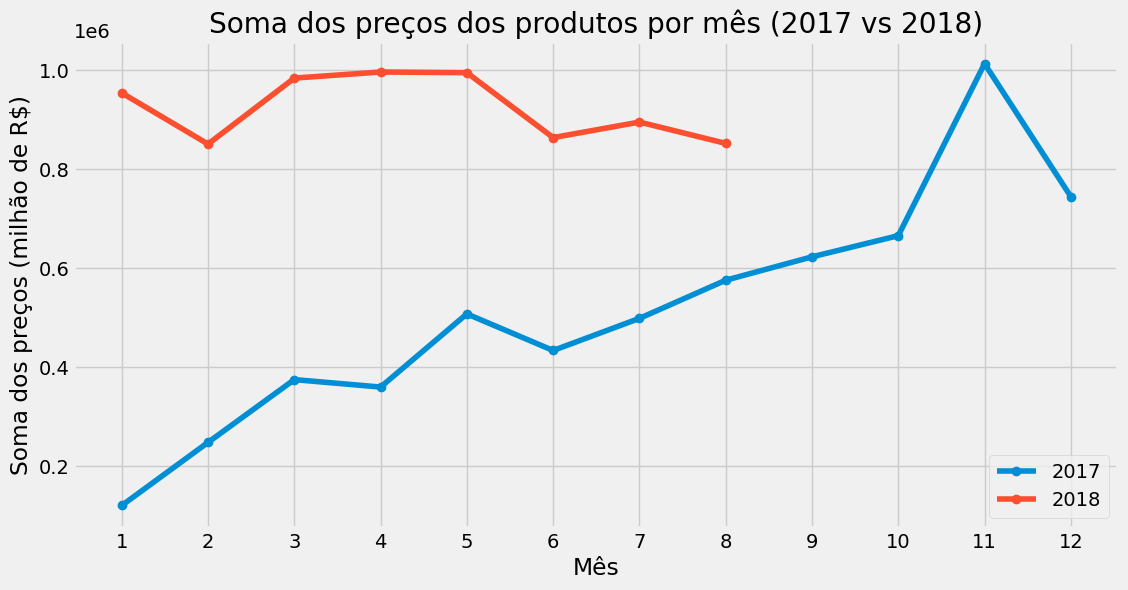

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Garantir que a coluna de data está no formato datetime
final['order_purchase_timestamp'] = pd.to_datetime(final['order_purchase_timestamp'])

# Extrair ano e mês
final['year'] = final['order_purchase_timestamp'].dt.year
final['month'] = final['order_purchase_timestamp'].dt.month

# Filtrar apenas os anos de interesse
final_filtered = final[final['year'].isin([2017, 2018])]

# Agrupar por mês e ano, somando os preços
monthly_prices = final_filtered.groupby(['month', 'year'])['price'].sum().unstack()

plt.figure(figsize=(12, 6))
plt.plot(monthly_prices.index, monthly_prices[2017], marker='o', label='2017')
plt.plot(monthly_prices.index, monthly_prices[2018], marker='o', label='2018')
plt.title('Soma dos preços dos produtos por mês (2017 vs 2018)')
plt.xlabel('Mês')
plt.ylabel('Soma dos preços (milhão de R$)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)

In [ ]:
import pandas as pd

# Garantir que a coluna de data está no formato datetime
final['order_purchase_timestamp'] = pd.to_datetime(final['order_purchase_timestamp'])

# Extrair ano e mês
final['year'] = final['order_purchase_timestamp'].dt.year
final['month'] = final['order_purchase_timestamp'].dt.month

# Filtrar apenas os anos de interesse
final_filtered = final[final['year'].isin([2017, 2018])]

# Agrupar por mês e ano, somando os preços
monthly_prices = final_filtered.groupby(['month', 'year'])['price'].sum().unstack()

# Exibir a tabela
print(monthly_prices)


year        2017      2018
month                     
1      121087.90 954315.46
2      248513.12 851043.56
3      375323.81 984284.32
4      360254.95 996577.01
5      508070.64 995244.21
6      434137.25 864061.32
7      499005.26 895480.12
8      576053.50 852374.41
9      623284.97       NaN
10     666018.23       NaN
11    1013390.56       NaN
12     744883.35       NaN


# **Modelo base**

Bibliotecas para manipulação de dados, normalização, métricas, plotagem e construção de LSTM foram importadas.

Timestamps foram convertidos, ano e mês foram extraídos, e a soma dos preços por mês para 2017 e 2018 foi agregada com índice garantido de 1–12.

Série de treino foi construída usando 2017 completo e 2018 até agosto; valores faltantes foram interpolados e o conjunto foi escalonado com MinMaxScaler.

Janelas deslizantes (seq_length = 3) foram geradas formando X e y para treinamento do LSTM univariado.

Um modelo LSTM com 64 unidades foi construído e treinado usando MSE como função de perda e Adam como otimizador.

Previsões recursivas para os meses 9–12 de 2018 foram geradas, desscalonadas e incorporadas à série de 2018.

O desempenho foi avaliado em três frentes: janelas usadas no treino, validação retida (últimas K janelas) e comparação direta das previsões 9–12 quando valores reais estiverem disponíveis; foram calculadas RMSE, MAE, R2 e F1 após binarização quando aplicável.

Uma tabela com as previsões foi exibida e um gráfico comparativo entre 2017 (dados reais) e 2018 (reais até agosto + previsões set–dez) foi plotado.



=== Avaliação no Treino (sobre janelas usadas para treinar) ===
RMSE (treino): 103637.88
MAE  (treino): 78168.14
R2   (treino): 0.7623
F1 binarizado (treino): 1.0

=== Validação Retida (últimas K janelas) ===
RMSE (val): 84042.86
MAE  (val): 81623.01
R2   (val): -20.3187
F1 binarizado (val): N/A (classe única)

Não há valores reais nos meses 9-12 para comparar com as previsões, portanto métricas diretas não podem ser calculadas.

Previsões para 2018 (meses 9-12):
   month  predicted_price
0      9        888132.88
1     10        891846.62
2     11        888469.25
3     12        900011.69


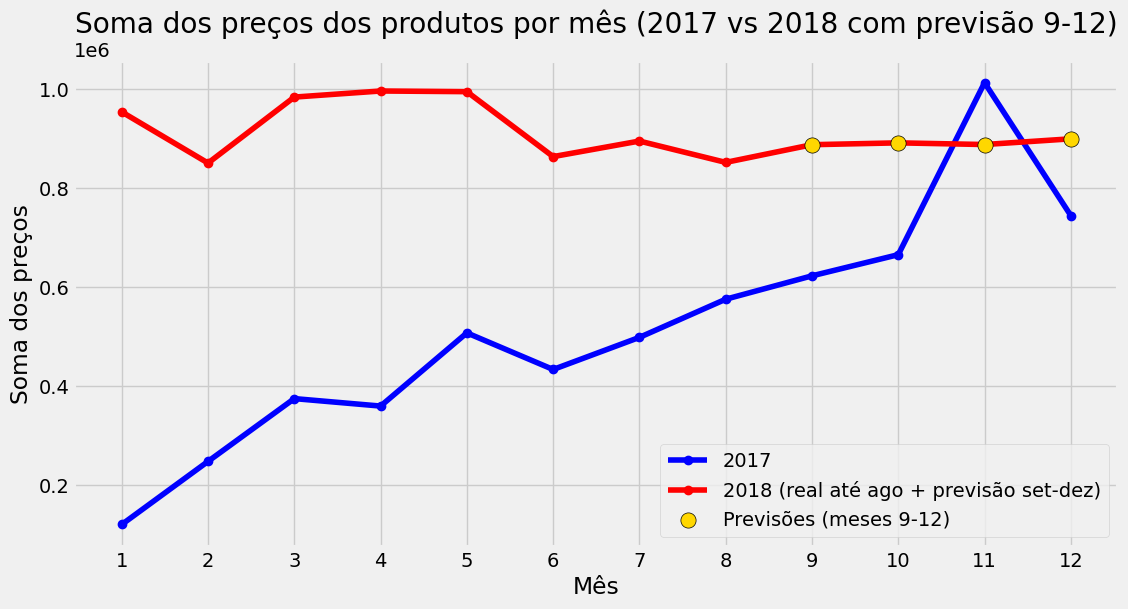

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Preparação (assume que 'final' já existe com order_purchase_timestamp e price) ---
final['order_purchase_timestamp'] = pd.to_datetime(final['order_purchase_timestamp'])
final['year'] = final['order_purchase_timestamp'].dt.year
final['month'] = final['order_purchase_timestamp'].dt.month

final_filtered = final[final['year'].isin([2017, 2018])]
monthly_prices = final_filtered.groupby(['month', 'year'])['price'].sum().unstack()
monthly_prices = monthly_prices.reindex(index=range(1,13))  # garantir meses 1..12

# --- Preparar série de treino (usar 2017 completo + 2018 até agosto) ---
train_2017 = monthly_prices[2017].values  # 12 valores (pode conter NaN)
train_2018_up_to_aug = monthly_prices[2018].iloc[:8].values  # meses 1..8 de 2018

# Interpolar NaNs se necessário nos dados de treino
train_all = np.concatenate([train_2017, train_2018_up_to_aug])
s = pd.Series(train_all)
if s.isna().any():
    s = s.interpolate(limit_direction='both')
train_all = s.values.reshape(-1, 1)

# --- Normalizar ---
scaler = MinMaxScaler()
train_norm = scaler.fit_transform(train_all)

# --- Criar sequências ---
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 3
X, y = create_sequences(train_norm, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- Construir e treinar o LSTM ---
model = Sequential([LSTM(64, activation='tanh', input_shape=(seq_length, 1)), Dense(1)])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, batch_size=8, verbose=0)

# --- Previsão recursiva para meses 9..12 de 2018 ---
last_window = train_norm[-seq_length:].reshape(1, seq_length, 1)
preds_norm = []
cur = last_window.copy()
steps = 4
for _ in range(steps):
    p = model.predict(cur, verbose=0)
    preds_norm.append(p.flatten()[0])
    cur = np.concatenate([cur[:,1:,:], p.reshape(1,1,1)], axis=1)

preds_norm = np.array(preds_norm).reshape(-1, 1)
preds_inv = scaler.inverse_transform(preds_norm).flatten()  # previsões em escala original

# --- Montar série 2018 completa com previsões para meses 9..12 ---
full_2018 = monthly_prices[2018].copy()
for i, m in enumerate(range(9, 13)):
    full_2018.loc[m] = preds_inv[i]

# --- Avaliação: métricas e F1 integradas ---
import numpy as _np

# Threshold para binarização: média combinada dos valores reais disponíveis
combined_for_thresh = _np.concatenate([
    monthly_prices[2017].dropna().values,
    monthly_prices[2018].dropna().values
])
threshold = _np.nanmean(combined_for_thresh)

# 1) Avaliação no conjunto de treino (usar X e y usados no treino)
train_pred_norm = model.predict(X, verbose=0)
train_pred_inv = scaler.inverse_transform(train_pred_norm.reshape(-1,1)).flatten()
y_train_inv = scaler.inverse_transform(y.reshape(-1,1)).flatten()

rmse_train = np.sqrt(mean_squared_error(y_train_inv, train_pred_inv))
mae_train = mean_absolute_error(y_train_inv, train_pred_inv)
r2_train = r2_score(y_train_inv, train_pred_inv)
y_train_bin = (y_train_inv > threshold).astype(int)
y_train_pred_bin = (train_pred_inv > threshold).astype(int)
f1_train = f1_score(y_train_bin, y_train_pred_bin) if len(_np.unique(y_train_bin))>1 else np.nan

print("=== Avaliação no Treino (sobre janelas usadas para treinar) ===")
print(f"RMSE (treino): {rmse_train:.2f}")
print(f"MAE  (treino): {mae_train:.2f}")
print(f"R2   (treino): {r2_train:.4f}")
print(f"F1 binarizado (treino): {f1_train if not _np.isnan(f1_train) else 'N/A (classe única)'}\n")

# 2) Validação retida (walk-forward simples usando últimas K janelas)
K = 3  # ajuste conforme desejar
# Reconstruir série usada no treino (interpolada)
train_2017 = monthly_prices[2017].values
train_2018_up_to_aug = monthly_prices[2018].iloc[:8].values
train_all = _np.concatenate([train_2017, train_2018_up_to_aug])
s = pd.Series(train_all)
if s.isna().any():
    s = s.interpolate(limit_direction='both')
train_all = s.values.reshape(-1,1)

# Normalizar com o mesmo scaler (já fit)
norm = scaler.transform(train_all)

def create_seq_plain(arr, seq_length):
    Xv, yv = [], []
    for i in range(len(arr) - seq_length):
        Xv.append(arr[i:i+seq_length])
        yv.append(arr[i+seq_length])
    return _np.array(Xv), _np.array(yv)

X_all, y_all = create_seq_plain(norm, seq_length)

if X_all.shape[0] >= K:
    X_val = X_all[-K:].reshape((K, seq_length, 1))
    y_val = y_all[-K:].reshape((K,1))
    pred_val_norm = model.predict(X_val, verbose=0)
    pred_val_inv = scaler.inverse_transform(pred_val_norm).flatten()
    y_val_inv = scaler.inverse_transform(y_val).flatten()

    rmse_val = np.sqrt(mean_squared_error(y_val_inv, pred_val_inv))
    mae_val = mean_absolute_error(y_val_inv, pred_val_inv)
    r2_val = r2_score(y_val_inv, pred_val_inv)
    y_val_bin = (y_val_inv > threshold).astype(int)
    y_val_pred_bin = (pred_val_inv > threshold).astype(int)
    f1_val = f1_score(y_val_bin, y_val_pred_bin) if len(_np.unique(y_val_bin))>1 else np.nan

    print("=== Validação Retida (últimas K janelas) ===")
    print(f"RMSE (val): {rmse_val:.2f}")
    print(f"MAE  (val): {mae_val:.2f}")
    print(f"R2   (val): {r2_val:.4f}")
    print(f"F1 binarizado (val): {f1_val if not _np.isnan(f1_val) else 'N/A (classe única)'}\n")
else:
    print("Não há janelas suficientes para validação retida com K =", K)

# 3) Avaliação direta nas previsões 9..12 (quando existirem valores reais)
pred_months = [9,10,11,12]
y_true_list = []
y_pred_list = []
eval_months = []

for i, m in enumerate(pred_months):
    real = monthly_prices[2018].loc[m]  # valor real original (pode ser NaN)
    pred = preds_inv[i]
    if not pd.isna(real):
        eval_months.append(m)
        y_true_list.append(real)
        y_pred_list.append(pred)

if len(y_true_list) > 0:
    y_true_arr = _np.array(y_true_list)
    y_pred_arr = _np.array(y_pred_list)
    rmse_p = _np.sqrt(mean_squared_error(y_true_arr, y_pred_arr))
    mae_p = mean_absolute_error(y_true_arr, y_pred_arr)
    r2_p = r2_score(y_true_arr, y_pred_arr)
    y_true_bin = (y_true_arr > threshold).astype(int)
    y_pred_bin = (y_pred_arr > threshold).astype(int)
    f1_p = f1_score(y_true_bin, y_pred_bin) if len(_np.unique(y_true_bin))>1 else np.nan

    print("=== Avaliação nas Previsões (meses 9-12) ===")
    print(f"Meses avaliados: {eval_months}")
    print(f"RMSE (pred): {rmse_p:.2f}")
    print(f"MAE  (pred): {mae_p:.2f}")
    print(f"R2   (pred): {r2_p:.4f}")
    print(f"F1 binarizado (pred): {f1_p if not _np.isnan(f1_p) else 'N/A (classe única)'}")
else:
    print("Não há valores reais nos meses 9-12 para comparar com as previsões, portanto métricas diretas não podem ser calculadas.")

# --- Mostrar as previsões numéricas (meses 9..12) ---
pred_df = pd.DataFrame({'month': pred_months, 'predicted_price': preds_inv})
print("\nPrevisões para 2018 (meses 9-12):")
print(pred_df)

# --- Plotagem final: 2017 (azul) e 2018 completo com previsões destacadas ---
months = monthly_prices.index  # 1..12
plt.figure(figsize=(12,6))
plt.plot(months, monthly_prices[2017].values, marker='o', color='blue', label='2017')

plt.plot(months, full_2018.values, marker='o', color='red', label='2018 (real até ago + previsão set-dez)')

pred_vals = [full_2018.loc[m] for m in pred_months]
plt.scatter(pred_months, pred_vals, color='gold', edgecolor='black', zorder=5, s=120, label='Previsões (meses 9-12)')

plt.title('Soma dos preços dos produtos por mês (2017 vs 2018 com previsão 9-12)')
plt.xlabel('Mês')
plt.ylabel('Soma dos preços')
plt.xticks(range(1,13))
plt.grid(True)
plt.legend()
plt.show()




# **Cronograma**

### **ok - Realizado**

### **Pr - Programado**

### **At - Atrasado**

### **Documento orininal disponibilixado no projeto**

'Cronograma - Projeto Aplicado IV.xlsx

In [ ]:
# Configurações para exibir todas as linhas e colunas
pd.set_option('display.max_rows', None)       # Mostra todas as linhas
pd.set_option('display.max_columns', None)    # Mostra todas as colunas
pd.set_option('display.width', None)          # Ajusta a largura da tela
pd.set_option('display.max_colwidth', None)   # Mostra conteúdo completo das células

# Carrega a planilha
df = pd.read_excel(r'Cronograma - Projeto Aplicado IV.xlsx', engine='openpyxl',
                   skiprows=3)

# Exibe o DataFrame sem a coluna 'Titulo'
df.drop(columns='Titulo')

,Etapa,Atividades,Responsável,Início,Término,Duração (dias),Milestones,Status,2025-08-19 00:00:00,2025-08-20 00:00:00,2025-08-21 00:00:00,2025-08-22 00:00:00,2025-08-23 00:00:00,2025-08-24 00:00:00,2025-08-25 00:00:00,2025-08-26 00:00:00,2025-08-27 00:00:00,2025-08-28 00:00:00,2025-08-29 00:00:00,2025-08-30 00:00:00,2025-08-31 00:00:00,2025-09-01 00:00:00,2025-09-02 00:00:00,2025-09-03 00:00:00,2025-09-04 00:00:00,2025-09-05 00:00:00,2025-09-06 00:00:00,2025-09-07 00:00:00,2025-09-08 00:00:00,2025-09-09 00:00:00,2025-09-10 00:00:00,2025-09-11 00:00:00,2025-09-12 00:00:00,2025-09-13 00:00:00,2025-09-14 00:00:00,2025-09-15 00:00:00,2025-09-16 00:00:00,2025-09-17 00:00:00,2025-09-18 00:00:00,2025-09-19 00:00:00,2025-09-20 00:00:00,2025-09-21 00:00:00,2025-09-22 00:00:00,2025-09-23 00:00:00,2025-09-24 00:00:00,2025-09-25 00:00:00,2025-09-26 00:00:00,2025-09-27 00:00:00,2025-09-28 00:00:00,2025-09-29 00:00:00,2025-09-30 00:00:00,2025-10-01 00:00:00,2025-10-02 00:00:00,2025-10-03 00:00:00,2025-10-04 00:00:00,2025-10-05 00:00:00,2025-10-06 00:00:00,2025-10-07 00:00:00,2025-10-08 00:00:00,2025-10-09 00:00:00,2025-10-10 00:00:00,2025-10-11 00:00:00,2025-10-12 00:00:00,2025-10-13 00:00:00,2025-10-14 00:00:00,2025-10-15 00:00:00,2025-10-16 00:00:00,2025-10-17 00:00:00,2025-10-18 00:00:00,2025-10-19 00:00:00,2025-10-20 00:00:00,2025-10-21 00:00:00,2025-10-22 00:00:00,2025-10-23 00:00:00,2025-10-24 00:00:00,2025-10-25 00:00:00,2025-10-26 00:00:00,2025-10-27 00:00:00,2025-10-28 00:00:00,2025-10-29 00:00:00,2025-10-30 00:00:00,2025-10-31 00:00:00,2025-11-01 00:00:00,2025-11-02 00:00:00,2025-11-03 00:00:00,2025-11-04 00:00:00,2025-11-05 00:00:00,2025-11-06 00:00:00,2025-11-07 00:00:00,2025-11-08 00:00:00,2025-11-09 00:00:00,2025-11-10 00:00:00,2025-11-11 00:00:00,2025-11-12 00:00:00,2025-11-13 00:00:00,2025-11-14 00:00:00,2025-11-15 00:00:00,2025-11-16 00:00:00,2025-11-17 00:00:00,2025-11-18 00:00:00,2025-11-19 00:00:00,2025-11-20 00:00:00,2025-11-21 00:00:00,2025-11-22 00:00:00,2025-11-23 00:00:00,2025-11-24 00:00:00,2025-11-25 00:00:00,2025-11-26 00:00:00,2025-11-27 00:00:00,2025-11-28 00:00:00,2025-11-29 00:00:00,2025-11-30 00:00:00
0,1,Definição do grupo de trabalho,Erick,2025-08-21,2025-08-22,2,2025-08-30,Concluído,-,-,ok,ok,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,1,Definição das premissas do projeto,Erick,2024-08-21,2024-08-22,2,2025-08-30,Concluído,-,-,ok,ok,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,1,Definição do tema,Carlos,2024-08-21,2024-08-22,2,2025-08-30,Concluído,-,-,ok,ok,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,1,Escolha da base de dados,Felipe,2024-08-21,2024-08-26,6,2025-08-30,Concluído,-,-,ok,ok,ok,ok,ok,ok,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,1,Organização do repositório de materiais (GitHub),Felipe,2024-08-21,2024-08-26,6,2025-08-30,Concluído,-,-,ok,ok,ok,ok,ok,ok,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
5,1,Documentação inicial,Carlos,2024-08-27,2024-08-28,2,2025-08-30,Concluído,-,-,-,-,-,-,-,-,ok,ok,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
6,1,Elaboração do documento,Carlos,2024-09-02,2024-09-11,10,2

# **Referências**

Hochreiter, S.; Schmidhuber, J. Long Short‑Term Memory. Neural Computation, 1997.
Goodfellow, I.; Bengio, Y.; Courville, A. Deep Learning. MIT Press, 2016.
Box, G. E. P.; Jenkins, G. M. Time Series Analysis: Forecasting and Control. 1976.
Sezer, O. B.; Kazanç, Ö. Aplicações de LSTM para previsão de séries financeiras, 2020.
Brown; Meyer. Validação temporal em séries, 2018.
Wing, J. M. Computational Thinking. Communications of the ACM, v.49, n.3, p.33–35, 2006.

SILVA, M. Pensamento Computacional: teoria e prática. Campo Grande: UFMS, 2020. Disponível em: https://repositorio.ufms.br/bitstream/123456789/8876/4/Pensamento%20Computacional.pdf. Acesso em: 20 set. 2025.

SOMAI. Entenda os pilares do pensamento computacional e potencialize sua aprendizagem. 2023. Disponível em: https://somai.com.br/blog/pilares-do-pensamento-computacional/.. Acesso em: 20 set. 2025.

https://medium.com/@iqra1804/time-series-forecasting-using-lstm-an-introduction-with-code-explanations-c5c2e8ca137d

https://www.teses.usp.br/teses/disponiveis/45/45133/tde-08042024-094807/publico/Dissertacao_Dani_Martins_Mestrado_Final_11.pdf

https://repositorio.ufgd.edu.br/jspui/bitstream/prefix/4806/1/JhonatanCorreaLeandro.pdf

https://www.datacamp.com/pt/tutorial/lstm-python-stock-market

https://towardsdatascience.com/
five-practical-applications-of-the-lstm-model-for-time-series-with-code-a7aac0aa85c0/

https://www.peteletricaufu.com.br/static/ceel/artigos/artigo_625.pdf






In [ ]:
#@title **Nota Final**
nota = 0.50*EDA_e_preprocessamento + 0.50*Modelo_base

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_nome = []

for i in range(1,4):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]);")

alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 10.0



,nome,nota
0,Carlos Oliveira,10.00
1,Erick Isidoro,10.00
2,Felipe Perraz,10.00


In [ ]:
#@title **Avaliação**
EDA_e_preprocessamento = 10 #@param {type:"slider", min:0, max:10, step:1}

Modelo_base = 10 #@param {type:"slider", min:0, max:10, step:1}